# Load and view light level data from lightlevels.py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filename = "lightlevels-2019-10-25.csv"
df = pd.read_csv(filename, header=None, names=['Datetime', 'Brightness', 'EWMA'])
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')
df.shape

(152155, 2)

In [3]:
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df['Second'] = df.index.second

In [4]:
import datetime

def seconds_since_midnight(dt):
    return datetime.timedelta(hours=dt.hour, minutes=dt.minute,
                              seconds=dt.second).total_seconds()

dt = pd.Timestamp('2019-10-25 23:26:59')
assert seconds_since_midnight(dt) == (23*60 + 26)*60 + 59

In [5]:
df['Time of day (hours)'] = df.index.map(seconds_since_midnight)/3600

In [6]:
df.head()

,Brightness,EWMA,Hour,Minute,Second,Time of day (hours)
Datetime,,,,,,
2019-10-25 23:26:55,8,8.90,23,26,55,23.448611
2019-10-25 23:26:56,9,8.91,23,26,56,23.448889
2019-10-25 23:26:57,9,8.92,23,26,57,23.449167
2019-10-25 23:26:58,8,8.83,23,26,58,23.449444
2019-10-25 23:26:59,8,8.74,23,26,59,23.449722


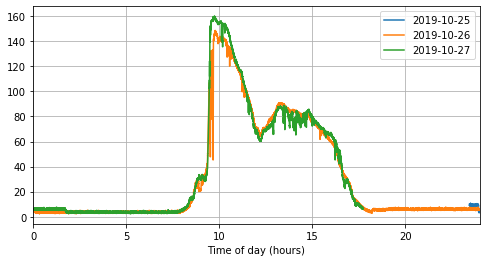

In [7]:
dates = np.unique(df.index.date)

plt.figure(figsize=(8,4))
for day in dates:
    data_for_day = df.loc[df.index.date == day, :]
    data_for_day = data_for_day.set_index('Time of day (hours)')
    data_for_day['EWMA'].plot(label=day)
plt.grid()
plt.legend()
plt.show()

In [8]:
average_brightness_by_hour = \
    df.groupby('Hour')['EWMA'].mean().rename('Average')
mode_brightness_by_hour = \
    df.groupby('Hour')['EWMA'].median().rename('Median')
pd.concat([average_brightness_by_hour, mode_brightness_by_hour], axis=1)

,Average,Median
Hour,,
0,4.835404,5.025
1,4.485278,3.870
2,3.582515,3.560
3,3.589444,3.580
4,3.565768,3.560
5,3.586911,3.580
6,3.553137,3.550
7,3.771028,3.690
8,15.428772,13.905


In [9]:
df['EWMA'].min(), df['EWMA'].max()

(2.22, 159.95)

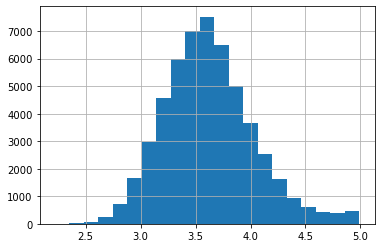

In [25]:
df.loc[df.EWMA < 5, 'EWMA'].hist(bins=21)

In [26]:
# 3.7 seems to be the threshold for nighttime (all lights off)
b_min = 4.5

In [27]:
# Try an exponential scale
np.exp(0)

1.0

In [28]:
# Assume the following map to brightness values
[print(f'{i}: {b_min*np.exp(i):.6g},') for i in range(0, 12)]

0: 4.5,
1: 12.2323,
2: 33.2508,
3: 90.3849,
4: 245.692,
5: 667.859,
6: 1815.43,
7: 4934.85,
8: 13414.3,
9: 36463.9,
10: 99119.1,
11: 269434,


[None, None, None, None, None, None, None, None, None, None, None, None]

In [13]:
brightness_levels = {
    0: 3.7,
    1: 10.0576,
    2: 27.3395,
    3: 74.3165,
    4: 202.013,
    5: 549.129,
    6: 1492.69,
    7: 4057.54,
    8: 11029.5,
    9: 29981.4,
    10: 81497.9,
    11: 221534
}

brightness_levels = np.array(list(brightness_levels.items()))

brightness_levels

array([[0.00000e+00, 3.70000e+00],
       [1.00000e+00, 1.00576e+01],
       [2.00000e+00, 2.73395e+01],
       [3.00000e+00, 7.43165e+01],
       [4.00000e+00, 2.02013e+02],
       [5.00000e+00, 5.49129e+02],
       [6.00000e+00, 1.49269e+03],
       [7.00000e+00, 4.05754e+03],
       [8.00000e+00, 1.10295e+04],
       [9.00000e+00, 2.99814e+04],
       [1.00000e+01, 8.14979e+04],
       [1.10000e+01, 2.21534e+05]])

In [14]:
brightness = 14
np.argmax(brightness_levels[:, 1] > brightness)

2

In [15]:
def brightness_level(brightness):
    if brightness > brightness_levels[:, 1].max():
        level = brightness_levels[:, 0].max()
    else:
        idx = np.argmax(brightness_levels[:, 1] > brightness)
        level = brightness_levels[idx, 0]
    return int(level)

brightness_level(0)

0

In [16]:
brightness_level(3), brightness_level(4)

(0, 1)

In [17]:
brightness_level(160000)

11

In [18]:
brightness_level(9999999)

11

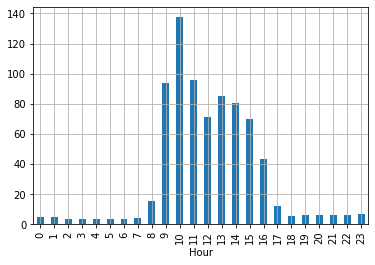

In [19]:
average_brightness_by_hour.plot.bar()
plt.grid()
plt.show()

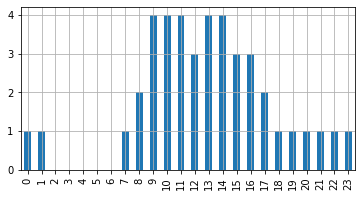

In [20]:
levels_by_hour = [
    brightness_level(average_brightness_by_hour.loc[hour])
    for hour in range(24)
]
pd.Series(levels_by_hour).plot.bar(figsize=(6,3))
plt.grid()
plt.show()